In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

##### Objective: to explore the dataset using python(or other language of choice) libraries and build a few classification models to predict a basketball teams chance of getting into top 8 final teams.

This dataset is about the performance of basketball teams. The cbb.csv data set includes performance data about five seasons of 354 basketball teams. The dataset can be loaded in python as df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/cbb.csv'  

Secondly, share ROC curves and accuracy scores of your models to find the best model. 

The data field POSTSEASON will give you the previous result of the team (example champion, 2nd, E8=top 8 etc.) You will share the python notebook or other language codes file used with results.

##### Variable Description
TEAM: The Division I college basketball school

CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)

G: Number of games played

W: Number of games won

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

BARTHAG: Power Rating (Chance of beating an average Division I team)

EFG_O: Effective Field Goal Percentage Shot

EFG_D: Effective Field Goal Percentage Allowed

TOR: Turnover Percentage Allowed (Turnover Rate)

TORD: Turnover Percentage Committed (Steal Rate)

ORB: Offensive Rebound Rate

DRB: Offensive Rebound Rate Allowed

FTR : Free Throw Rate (How often the given team shoots Free Throws)

FTRD: Free Throw Rate Allowed

2P_O: Two-Point Shooting Percentage

2P_D: Two-Point Shooting Percentage Allowed

3P_O: Three-Point Shooting Percentage

3P_D: Three-Point Shooting Percentage Allowed

ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)

WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)

POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)

SEED: Seed in the NCAA March Madness Tournament

YEAR: Season

In [200]:
df=pd.read_csv('cbb.csv')
df

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0     North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1          Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2         Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3           Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4             Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
...              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
1401         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
1402        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
1403          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
1404             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
1405       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

      TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0     18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1     20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2     14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3     18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4     18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1401  18.2  34.4  26.0  31.6  37.3  51.3  43.0  35.5  27.9   67.3   7.8   
1402  18.0  24.7  24.8  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2   
1403  20.9  29.6  28.8  29.4  33.9  51.6  48.8  35.1  29.0   65.4  -1.1   
1404  20.1  36.7  30.8  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3   
1405  18.0  31.6  30.2  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9   

     POSTSEASON  SEED  YEAR  
0           2ND   1.0  2016  
1     Champions   2.0  2016  
2            E8   6.0  2016  
3            E8   1.0  2016  
4            E8   1.0  2016  
...         ...   ...   ...  
1401        S16   3.0  2019  
1402        S16   2.0  2019  
1403        S16  12.0  2019  
1404        S16   3.0  2019  
1405        S16   2.0  2019  

[1406 rows x 24 columns]

In [201]:
#Understanding data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

Observation: 

POSTSEASON and SEED columns have the most null values.

No observable issue with data types.

In [202]:
#Checking unique values for each feature
for i in df.columns:
    print(i, df[i].nunique())

TEAM 355
CONF 32
G 17
W 36
ADJOE 323
ADJDE 278
BARTHAG 1291
EFG_O 164
EFG_D 150
TOR 109
TORD 114
ORB 205
DRB 154
FTR 227
FTRD 261
2P_O 176
2P_D 169
3P_O 142
3P_D 128
ADJ_T 150
WAB 307
POSTSEASON 8
SEED 16
YEAR 4


Observation: 
BARTHAG column has high number of unique values.


In [203]:
#Dimension of data
r,c=df.shape
print(f"Data has {r} rows and {c} columns.")

Data has 1406 rows and 24 columns.


In [204]:
#The data seems to be dominated by numerical entities. Checking the categorical and numerical columns in data. 
num_col=df.select_dtypes(include=np.number).columns
cat_col=df.select_dtypes(exclude=np.number).columns

print(f"The number of numerical columns are: {len(num_col)}\nNumerical columns are: \n{num_col}\n\nThe number of categorical columns are: {len(cat_col)}\nCategorical columns are: \n{cat_col}")

The number of numerical columns are: 21
Numerical columns are: 
Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED', 'YEAR'],
      dtype='object')

The number of categorical columns are: 3
Categorical columns are: 
Index(['TEAM', 'CONF', 'POSTSEASON'], dtype='object')


In [205]:
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64

##### Reason for replacing null values with 0: 
SEED is ranking assigned in case of draw. 

POSTSEASON is the stage at which the team was eliminated. 

Considering all the teams participating in the tournament only few teams will reach the higher stages of tournaments, so for those who did not reach the level to be considered by groups in these features we have assigned the 0 value. 

Rationale is, the team not included in top68 does not have a reasonable chance to win. 

In [206]:

df.replace(np.nan,0,inplace=True)

In [207]:
df.describe()

G            W        ADJOE        ADJDE      BARTHAG  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
mean     31.570413    16.724751   103.848720   103.849716     0.493272   
std       2.586927     6.492069     7.250998     6.422037     0.255095   
min      24.000000     1.000000    82.900000    85.200000     0.026600   
25%      30.000000    12.000000    98.900000    99.225000     0.281400   
50%      31.000000    16.000000   103.400000   104.000000     0.474000   
75%      33.000000    21.000000   108.300000   108.275000     0.711075   
max      40.000000    37.000000   128.400000   124.000000     0.974400   

             EFG_O        EFG_D          TOR         TORD          ORB  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
mean     50.406757    50.595448    18.458535    18.391821    28.881223   
std       3.042034     2.779066     1.949515     2.082490     4.045938   
min      40.000000    41.100000    13.500000    10.200000    15.000000   
25%      48.400000    48.800000    17.200000    17.000000    26.200000   
50%      50.400000    50.600000    18.400000    18.300000    29.000000   
75%      52.400000    52.400000    19.700000    19.700000    31.600000   
max      59.800000    59.500000    25.900000    27.600000    42.000000   

               DRB          FTR         FTRD         2P_O         2P_D  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
mean     29.062376    34.612233    34.885633    49.486415    49.642745   
std       2.963260     4.798377     5.735014     3.366320     3.211512   
min      18.400000    21.600000    21.800000    37.700000    38.400000   
25%      27.025000    31.300000    30.700000    47.200000    47.525000   
50%      28.900000    34.500000    34.300000    49.400000    49.600000   
75%      31.100000    37.800000    38.700000    51.600000    51.775000   
max      38.800000    49.400000    58.500000    62.600000    61.200000   

              3P_O         3P_D        ADJ_T          WAB         SEED  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
mean     34.662873    34.830228    69.292461    -7.855121     1.700569   
std       2.670789     2.333992     2.771836     7.001387     4.035337   
min      26.700000    27.500000    60.300000   -25.200000     0.000000   
25%      32.800000    33.200000    67.400000   -13.100000     0.000000   
50%      34.600000    34.800000    69.200000    -8.450000     0.000000   
75%      36.500000    36.400000    71.000000    -3.100000     0.000000   
max      43.400000    43.100000    83.400000    11.600000    16.000000   

              YEAR  
count  1406.000000  
mean   2017.502134  
std       1.119066  
min    2016.000000  
25%    2017.000000  
50%    2018.000000  
75%    2019.000000  
max    2019.000000

Observation: 

Most numerical features seem to have near normal distribution. 

On an average each team played 31 games out of which 16 games were won by an average team.
    

In [208]:
df.describe(exclude=np.number)

TEAM  CONF  POSTSEASON
count   1406  1406        1406
unique   355    32           9
top      VMI   ACC           0
freq       4    60        1134

Observation: 

Postseason has 8 unique values. A new column can be created indicating wheather a team ended up in top 8 in last season.

In [209]:
df['winpct']=round((df['W']/df['G'])*100,2)
df.head()

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Villanova   BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2      Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3        Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4          Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   

   TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0  18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1  20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2  14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3  18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4  18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   

  POSTSEASON  SEED  YEAR  winpct  
0        2ND   1.0  2016   82.50  
1  Champions   2.0  2016   87.50  
2         E8   6.0  2016   66.67  
3         E8   1.0  2016   78.38  
4         E8   1.0  2016   86.49

In [264]:
df['POSTSEASON'].value_counts()

0            1134
R64           128
R32            64
S16            32
E8             16
R68            16
F4              8
Champions       4
2ND             4
Name: POSTSEASON, dtype: int64

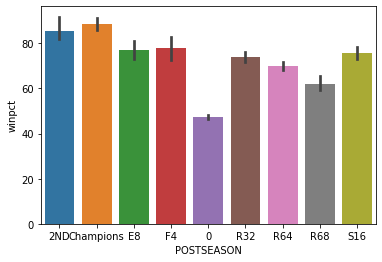

In [212]:
sns.barplot(df['POSTSEASON'],df['winpct'])

POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)

Observation: 

There is a trend in current winning percentage for top spot holders. In general highers spot holders have a greater current winning percentage. 

In [213]:
df['YEAR'].value_counts()

2019    353
2018    351
2017    351
2016    351
Name: YEAR, dtype: int64

In [214]:
df_2016=df[df['YEAR']==2016]
df_2017=df[df['YEAR']==2017]
df_2018=df[df['YEAR']==2018]
df_2019=df[df['YEAR']==2019]

In [215]:
df_2016['POSTSEASON'].value_counts()

0            283
R64           32
R32           16
S16            8
E8             4
R68            4
F4             2
Champions      1
2ND            1
Name: POSTSEASON, dtype: int64

In [216]:
df_2017['POSTSEASON'].value_counts()

0            283
R64           32
R32           16
S16            8
E8             4
R68            4
F4             2
Champions      1
2ND            1
Name: POSTSEASON, dtype: int64

In [217]:
df_2018['POSTSEASON'].value_counts()

0            283
R64           32
R32           16
S16            8
E8             4
R68            4
F4             2
Champions      1
2ND            1
Name: POSTSEASON, dtype: int64

In [218]:
df_2019['POSTSEASON'].value_counts()

0            285
R64           32
R32           16
S16            8
E8             4
R68            4
F4             2
Champions      1
2ND            1
Name: POSTSEASON, dtype: int64

Observation:

We have fixed number of teams that can reach each higher ranking spot  each year. 

In [219]:
df['top8']=df['POSTSEASON']

In [220]:
#Segregating teams reaching top 8 positions and those who didnt make it.
df['top8']=df['top8'].replace({'Champions':1,'F4':1,'E8':1,'2ND':1,'R68':0,'R64':0,'R32':0, 'S16':0 })

In [221]:
df.head()

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Villanova   BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2      Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3        Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4          Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   

   TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0  18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1  20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2  14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3  18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4  18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   

  POSTSEASON  SEED  YEAR  winpct  top8  
0        2ND   1.0  2016   82.50     1  
1  Champions   2.0  2016   87.50     1  
2         E8   6.0  2016   66.67     1  
3         E8   1.0  2016   78.38     1  
4         E8   1.0  2016   86.49     1

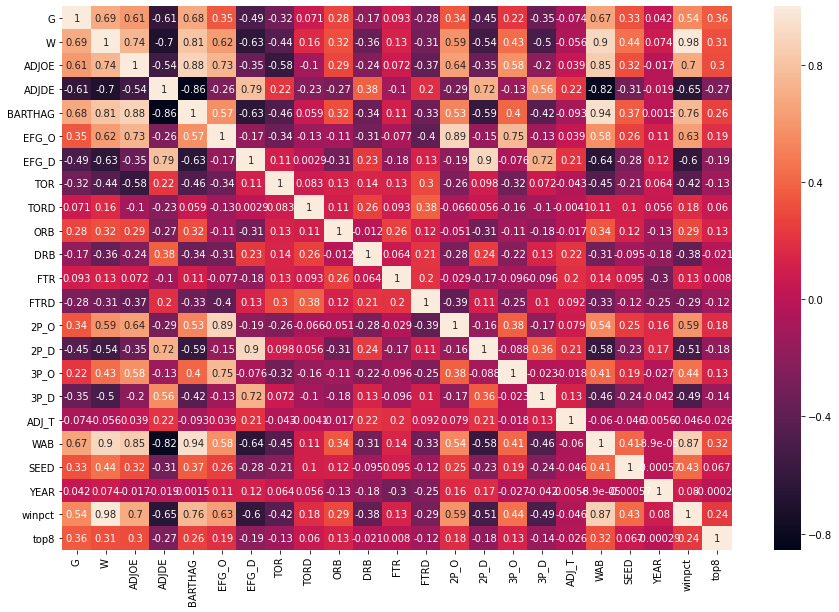

In [222]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

TOR TORD DRB FTR ADJ_T YEAR have low correlation with top8

Few features are strongly correlated with each other, this indicates we can apply dimensionality reduction technique to get best components representing the data

In [224]:
df['top8']=df['top8'].replace({1:'True',0:'False'})

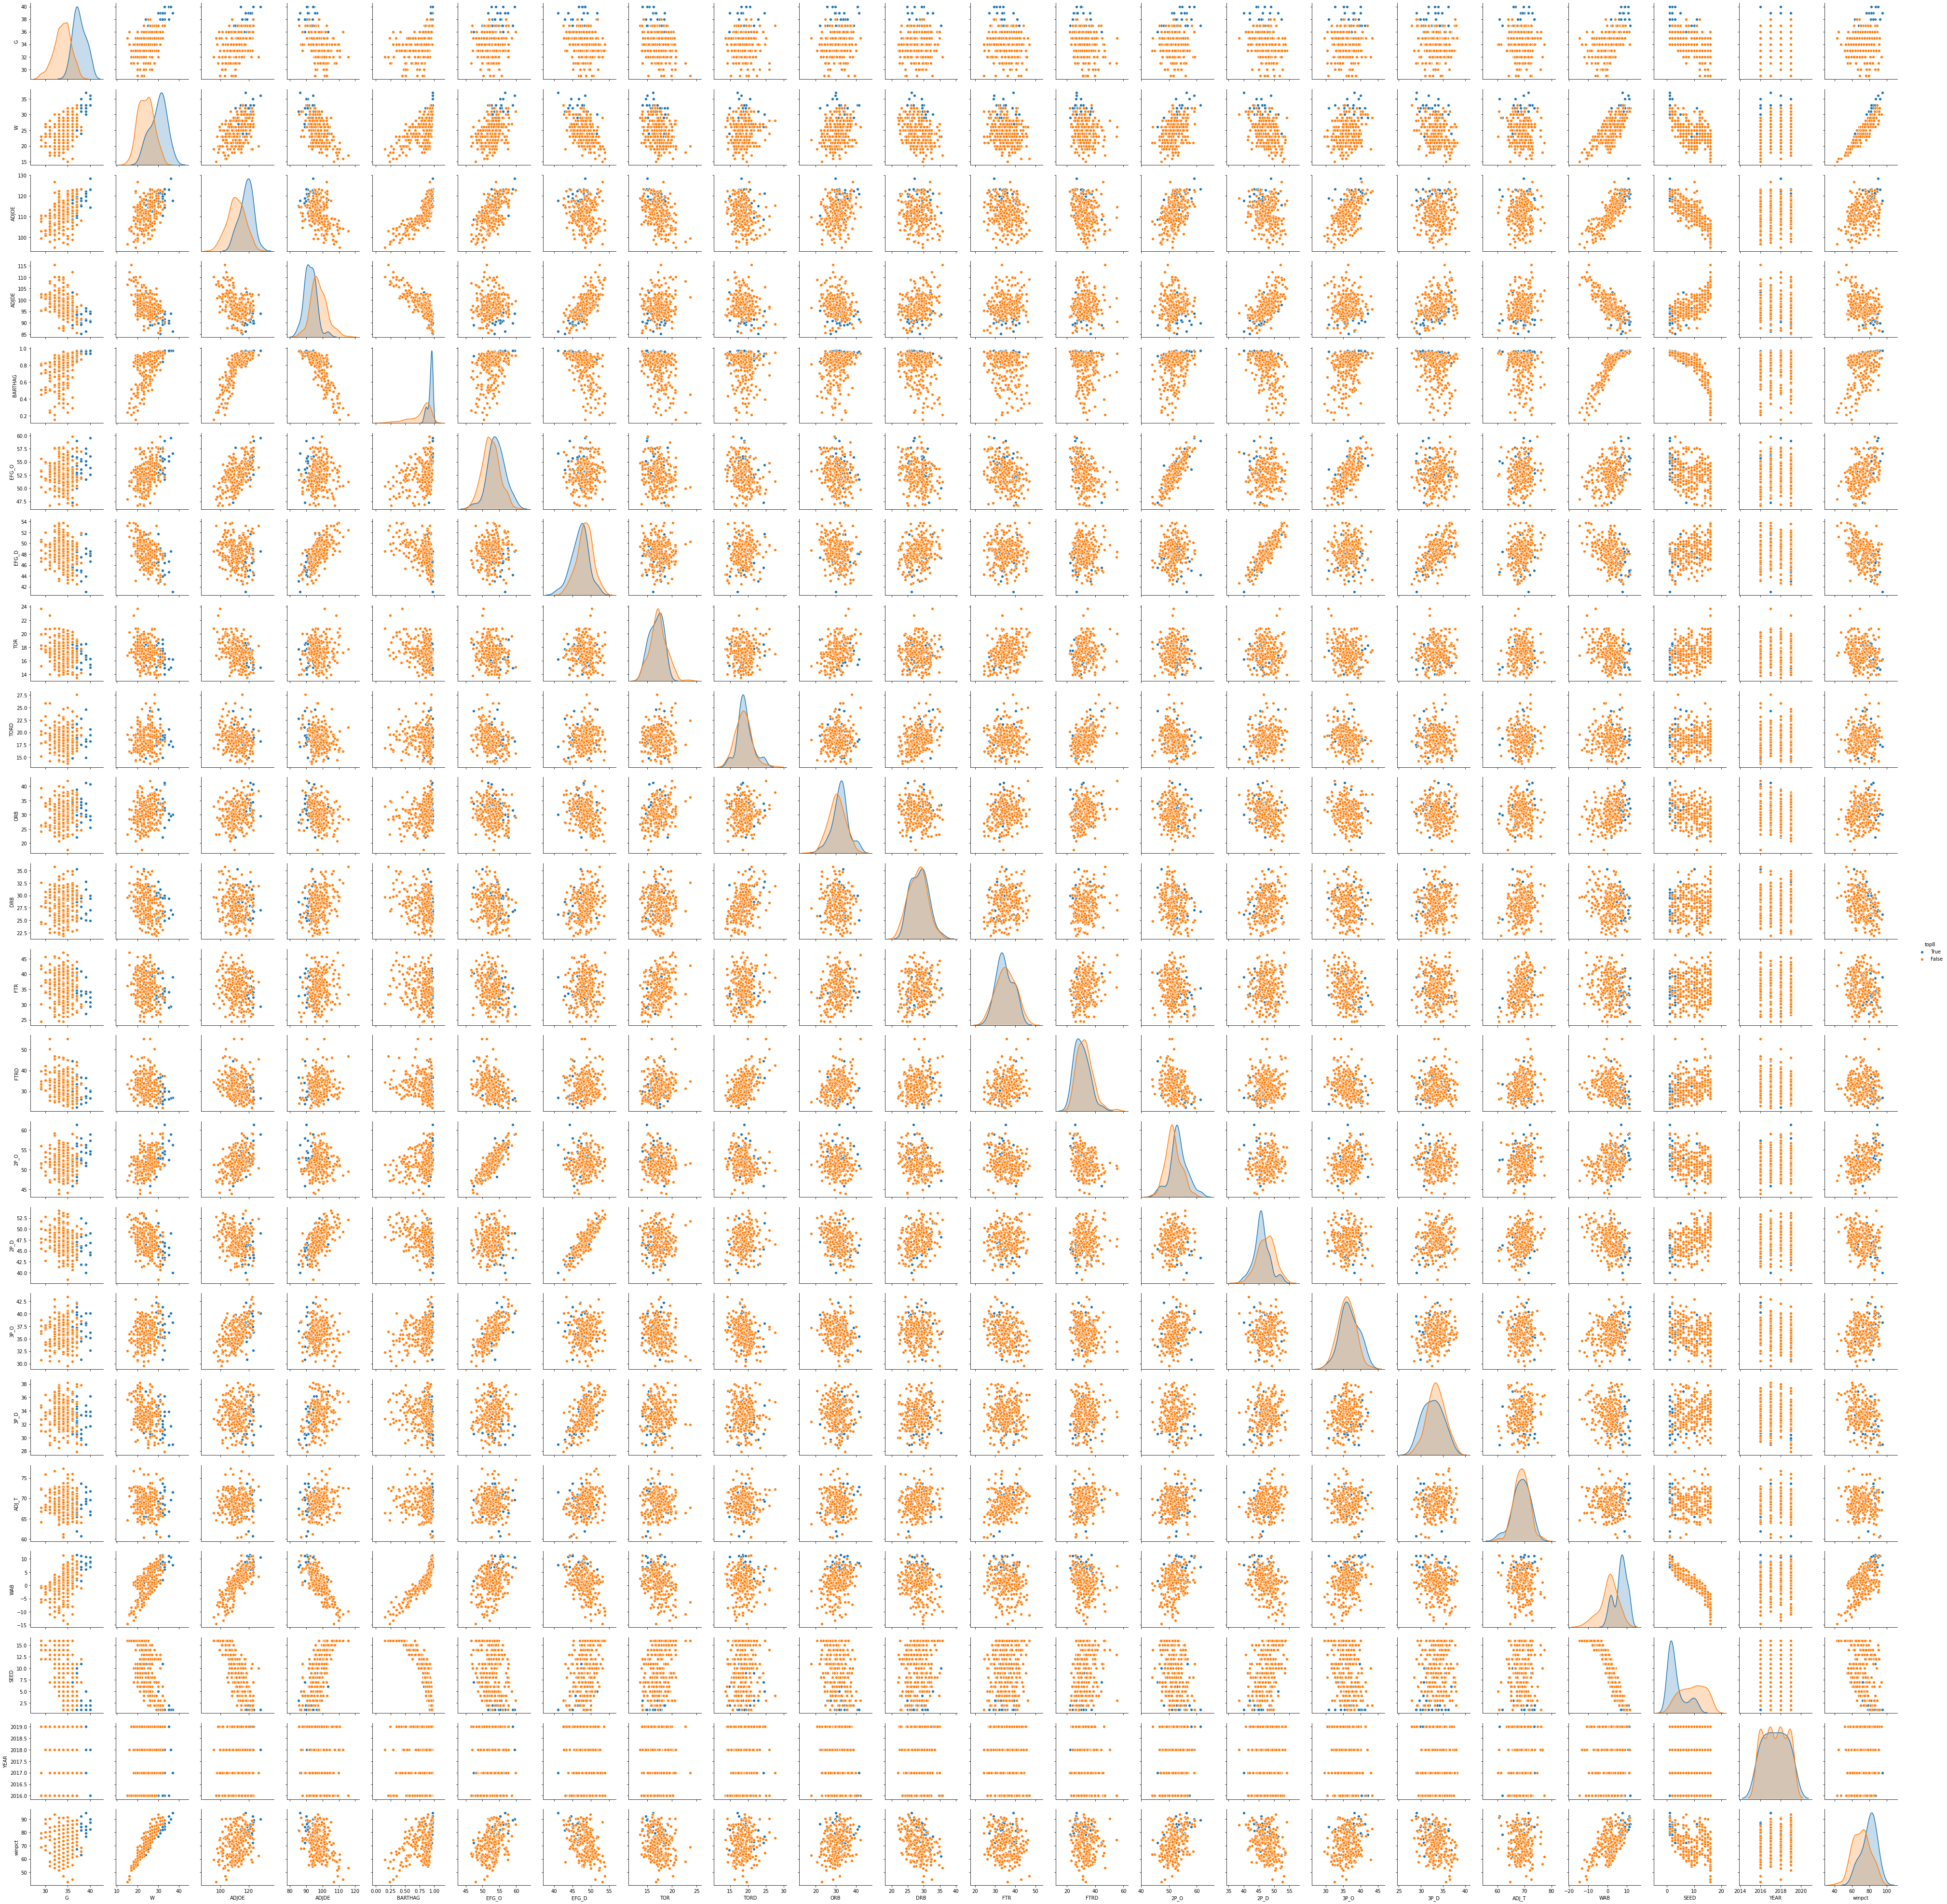

In [24]:
sns.pairplot(df,hue='top8')

Observations: 

Those with higher winning percentage get to play more games, after beating opponents at each level. There could be few exceptions to this observations. 

We cannot observe any clear difference in distribution of any feature with respect to top8 feature.

In [283]:
df.corr()

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G        1.000000  0.694294  0.610036 -0.606560  0.684179  0.351768 -0.489071   
W        0.694294  1.000000  0.740726 -0.697598  0.808328  0.624627 -0.629084   
ADJOE    0.610036  0.740726  1.000000 -0.541147  0.876854  0.733943 -0.350522   
ADJDE   -0.606560 -0.697598 -0.541147  1.000000 -0.855484 -0.262971  0.789522   
BARTHAG  0.684179  0.808328  0.876854 -0.855484  1.000000  0.566685 -0.632959   
EFG_O    0.351768  0.624627  0.733943 -0.262971  0.566685  1.000000 -0.169170   
EFG_D   -0.489071 -0.629084 -0.350522  0.789522 -0.632959 -0.169170  1.000000   
TOR     -0.324177 -0.437440 -0.584143  0.220306 -0.464304 -0.343668  0.109440   
TORD     0.070928  0.163512 -0.100177 -0.229428  0.059057 -0.128320  0.002917   
ORB      0.276452  0.315491  0.289171 -0.274805  0.316404 -0.105013 -0.311194   
DRB     -0.168511 -0.362473 -0.243611  0.381923 -0.343430 -0.310620  0.233499   
FTR      0.093426  0.127848  0.072360 -0.099570  0.105572 -0.077106 -0.177110   
FTRD    -0.277845 -0.310100 -0.372815  0.195381 -0.328662 -0.403423  0.126941   
2P_O     0.343096  0.586644  0.637790 -0.286613  0.526996  0.887056 -0.192840   
2P_D    -0.446854 -0.542603 -0.346566  0.722451 -0.593379 -0.148363  0.901366   
3P_O     0.220460  0.432303  0.578285 -0.132148  0.401678  0.754215 -0.076390   
3P_D    -0.348541 -0.500085 -0.201922  0.560496 -0.423502 -0.129869  0.723797   
ADJ_T   -0.073626 -0.056288  0.039005  0.216587 -0.092839  0.039121  0.207273   
WAB      0.665949  0.901692  0.852331 -0.816995  0.943035  0.578435 -0.641557   
SEED     0.330003  0.441948  0.317278 -0.308691  0.369366  0.264265 -0.279349   
YEAR     0.042113  0.073508 -0.016709 -0.018837  0.001464  0.108600  0.116721   
winpct   0.543491  0.978550  0.695080 -0.651031  0.760503  0.634096 -0.602436   
top8     0.359147  0.314378  0.304852 -0.267650  0.263959  0.188481 -0.193390   

              TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
G       -0.324177  0.070928  0.276452 -0.168511  0.093426 -0.277845  0.343096   
W       -0.437440  0.163512  0.315491 -0.362473  0.127848 -0.310100  0.586644   
ADJOE   -0.584143 -0.100177  0.289171 -0.243611  0.072360 -0.372815  0.637790   
ADJDE    0.220306 -0.229428 -0.274805  0.381923 -0.099570  0.195381 -0.286613   
BARTHAG -0.464304  0.059057  0.316404 -0.343430  0.105572 -0.328662  0.526996   
EFG_O   -0.343668 -0.128320 -0.105013 -0.310620 -0.077106 -0.403423  0.887056   
EFG_D    0.109440  0.002917 -0.311194  0.233499 -0.177110  0.126941 -0.192840   
TOR      1.000000  0.082966  0.127515  0.142924  0.133536  0.295218 -0.259642   
TORD     0.082966  1.000000  0.107461  0.261749  0.093449  0.380354 -0.066384   
ORB      0.127515  0.107461  1.000000 -0.011514  0.261221  0.116237 -0.051205   
DRB      0.142924  0.261749 -0.011514  1.000000  0.063573  0.209985 -0.282591   
FTR      0.133536  0.093449  0.261221  0.063573  1.000000  0.202800 -0.029459   
FTRD     0.295218  0.380354  0.116237  0.209985  0.202800  1.000000 -0.390162   
2P_O    -0.259642 -0.066384 -0.051205 -0.282591 -0.029459 -0.390162  1.000000   
2P_D     0.097793  0.055925 -0.314253  0.240275 -0.173371  0.111617 -0.156709   
3P_O    -0.315127 -0.155566 -0.111172 -0.223843 -0.096331 -0.254971  0.377605   
3P_D     0.071761 -0.101289 -0.175745  0.130546 -0.096385  0.102307 -0.169483   
ADJ_T   -0.042741 -0.004097 -0.016860  0.215007  0.195328  0.092148  0.078710   
WAB     -0.453637  0.107251  0.342269 -0.308396  0.139299 -0.326459  0.539533   
SEED    -0.212905  0.104545  0.118832 -0.095350  0.094819 -0.118662  0.246045   
YEAR     0.064392  0.056249 -0.129806 -0.180751 -0.299391 -0.254989  0.161103   
winpct  -0.420972  0.175752  0.291860 -0.382775  0.129510 -0.285453  0.593649   
top8    -0.127920  0.060163  0.127820 -0.020601  0.007962 -0.116078  0.177908   

             2P_D      3P_O      3P_D     ADJ_T       WAB      SEED      YEAR  \
G       -0.446854  0.220460 -0.348541 -0.0736

Observations:

Data linearly separable based on number of games won

Note:Considering correlation ~+-5

High positive correlation with games won: ADJOE,BARTHAG,EFG_O,2P_O,3P_O

High negative correlation with games won: ADJDE,EFG_D,TOR,2P_D,3P_D

In [225]:
df['top8']=df['top8'].replace({'True':1,'False':0})

In [226]:
num_col=df.select_dtypes(include=np.number).columns
cat_col=df.select_dtypes(exclude=np.number).columns

print(f"The number of numerical columns are: {len(num_col)}\nNumerical columns are: \n{num_col}\n\nThe number of categorical columns are: {len(cat_col)}\nCategorical columns are: \n{cat_col}")

The number of numerical columns are: 23
Numerical columns are: 
Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED', 'YEAR', 'winpct', 'top8'],
      dtype='object')

The number of categorical columns are: 3
Categorical columns are: 
Index(['TEAM', 'CONF', 'POSTSEASON'], dtype='object')


##### Approach

As the data is predominantly numerical we will proceed with PCA and check if we can reduce the dimentionality of data. PCA is suitable only to numerical data so we can concatenate the categorical data later. PCA performs best with scaled data and no missing values. 


#### Data Scaling 

In [228]:
#Segregating input and output column
data=df.select_dtypes(include=np.number)
data.head()
output=data['top8']
data=data.drop('top8',axis=1)

In [229]:
#Scaling input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data_sc=pd.DataFrame(sc.fit_transform(data),columns=data.columns)

In [230]:
data_sc.head()

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
0  3.259693  2.507835  2.683520 -1.394090  1.803217  0.721236 -0.898264   
1  3.259693  2.816013  2.655928 -2.017167  1.870667  1.872191 -1.402210   
2  1.712906  1.121035  1.993715 -0.085629  1.308323  1.181618 -0.394319   
3  2.099603  1.891480  2.214452 -2.001590  1.830275  1.444694 -0.790276   
4  2.099603  2.353746  2.352414 -2.095052  1.854589  1.740654 -1.978147   

        TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
0 -1.569428 -0.092144  2.922186  0.316529 -0.482050 -0.782427  1.311567   
1 -1.107611  1.060732 -0.168432  0.113977 -0.106789 -0.852199  2.351649   
2 -1.620741 -1.725386  0.944190  1.025460 -0.356963 -1.549917  1.014401   
3 -1.723367  0.196075  0.251892 -1.303885 -0.523745 -0.259138  0.925252   
4 -0.337914  0.051966  0.820566 -0.392402  0.831361  0.421137  0.954968   

       2P_D      3P_O      3P_D     ADJ_T       WAB      SEED      YEAR  \
0 -1.570768 -0.735203  0.587088  0.868881  2.351102 -0.173670 -1.342788   
1 -1.726513  0.575738 -0.398698 -0.935619  2.393966  0.074229 -1.342788   
2 -0.978936  1.025203  0.887110 -1.368699  1.450960  1.065825 -1.342788   
3 -1.041234  2.111411 -0.055816 -2.667940  2.351102 -0.173670 -1.342788   
4 -1.944557  2.485965 -0.998742  0.291441  2.779741 -0.173670 -1.342788   

     winpct  
0  1.709539  
1  1.991518  
2  0.816796  
3  1.477189  
4  1.934558

#### PCA for numerical Data

In [231]:
#Application of PCA to check which features explain most variance of the data.
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data_sc)

PCA()

In [232]:
#Eigen values for all variables
ev=pca.explained_variance_

In [233]:
ev

array([8.48512609e+00, 2.84333846e+00, 1.66656128e+00, 1.34052226e+00,
       1.05710231e+00, 9.89957088e-01, 9.13821503e-01, 8.03199158e-01,
       7.55834636e-01, 6.26620548e-01, 5.84100014e-01, 5.25057853e-01,
       4.53120759e-01, 3.80085809e-01, 3.70330983e-01, 1.38554087e-01,
       3.53132451e-02, 2.51012115e-02, 1.32954671e-02, 4.17051233e-03,
       2.31145923e-03, 2.13364218e-03])

In [234]:
#We will consider 95% explained variance to decide sufficient number of components.

In [235]:
pca.explained_variance_ratio_

array([3.85413234e-01, 1.29150735e-01, 7.56989070e-02, 6.08894921e-02,
       4.80159299e-02, 4.49660452e-02, 4.15077981e-02, 3.64830860e-02,
       3.43316845e-02, 2.84624942e-02, 2.65311173e-02, 2.38492915e-02,
       2.05817492e-02, 1.72643399e-02, 1.68212541e-02, 6.29343374e-03,
       1.60400586e-03, 1.14015266e-03, 6.03909584e-04, 1.89433914e-04,
       1.04991601e-04, 9.69147570e-05])

In [236]:
#to get upto which component we can account for 95% variance in data. Here till component 14 we can consider. 
#Note: indexing starts from 0.
np.cumsum(pca.explained_variance_ratio_)[:13]

array([0.38541323, 0.51456397, 0.59026288, 0.65115237, 0.6991683 ,
       0.74413434, 0.78564214, 0.82212523, 0.85645691, 0.88491941,
       0.91145052, 0.93529981, 0.95588156])

Text(0, 0.5, 'Cumulative explained variance')

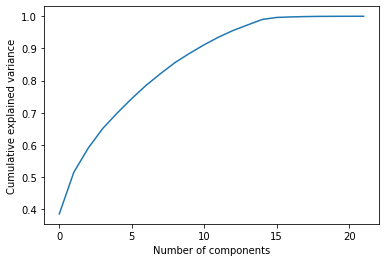

In [237]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [238]:
#Perform PCA with number of components as 14
pca=PCA(n_components=14)
pca.fit(data_sc)

PCA(n_components=14)

In [239]:
#Transforming the data into 14 components for further analysis
data_pcs=pca.transform(data_sc)

In [240]:
data_pcs.shape

(1406, 14)

In [241]:
#Labeling the principal components
data_pcs_df=pd.DataFrame(data_pcs,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','P14'])

In [242]:
data_pcs_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.960636 -0.785455  1.791129  0.995962 -0.619131 -2.667374  2.050877   
1  7.172423  0.098568  0.759793 -0.011683 -1.288325  0.131149  0.192550   
2  3.942691  1.410538  0.406531  2.240412 -1.756076 -0.974667  0.744654   
3  6.015010  0.613958 -0.588481  1.029211 -2.351555  1.435668  1.756936   
4  6.862988 -0.763203  1.372870  1.335841 -0.014993  1.036999  0.212809   

        PC8       PC9      PC10      PC11      PC12      PC13       P14  
0 -0.660978  0.770269 -0.099494  0.611746 -1.511393  0.694155  0.918364  
1 -1.082465  1.130970 -1.825097  0.200095 -0.694981  0.970154  0.780617  
2  1.226304  1.694224 -0.475175  0.038993 -0.473679 -0.004511  0.746423  
3 -0.738782  0.252733 -0.686482 -0.655949  0.238806  0.653658  0.149427  
4 -1.436309  0.652958  0.367714  0.367152  1.043822  0.514989  0.099189

In [243]:
#Adding categorical features from original data to get final dataframe.
=pd.concat([data_pcs_df,df.select_dtypes(exclude=np.number)], axis=1)
df_final.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.960636 -0.785455  1.791129  0.995962 -0.619131 -2.667374  2.050877   
1  7.172423  0.098568  0.759793 -0.011683 -1.288325  0.131149  0.192550   
2  3.942691  1.410538  0.406531  2.240412 -1.756076 -0.974667  0.744654   
3  6.015010  0.613958 -0.588481  1.029211 -2.351555  1.435668  1.756936   
4  6.862988 -0.763203  1.372870  1.335841 -0.014993  1.036999  0.212809   

        PC8       PC9      PC10      PC11      PC12      PC13       P14  \
0 -0.660978  0.770269 -0.099494  0.611746 -1.511393  0.694155  0.918364   
1 -1.082465  1.130970 -1.825097  0.200095 -0.694981  0.970154  0.780617   
2  1.226304  1.694224 -0.475175  0.038993 -0.473679 -0.004511  0.746423   
3 -0.738782  0.252733 -0.686482 -0.655949  0.238806  0.653658  0.149427   
4 -1.436309  0.652958  0.367714  0.367152  1.043822  0.514989  0.099189   

             TEAM CONF POSTSEASON  
0  North Carolina  ACC        2ND  
1       Villanova   BE  Champions  
2      Notre Dame  ACC         E8  
3        Virginia  ACC         E8  
4          Kansas  B12         E8

In [244]:
df_final['POSTSEASON'].value_counts()

0            1134
R64           128
R32            64
S16            32
E8             16
R68            16
F4              8
Champions       4
2ND             4
Name: POSTSEASON, dtype: int64

In [245]:
#POSTSEASON can be considered as ordinal variable as each class indicates spot in tournament. 
#So we will manually assign weights to each class. 
df_final['POSTSEASON']=df_final['POSTSEASON'].replace({'Champions':8,'F4':6,'E8':5,'2ND':7,'R68':1,'R64':2,'R32':3, 'S16':4 })

In [265]:
df.groupby('CONF')['winpct'].mean()

CONF
A10     52.727143
ACC     60.839333
AE      49.217778
ASun    47.868438
Amer    56.105000
B10     59.334286
B12     61.520250
BE      59.935250
BSky    48.663125
BSth    52.003721
BW      48.440278
CAA     53.018250
CUSA    51.830714
Horz    49.490750
Ivy     51.031562
MAAC    45.818864
MAC     56.298750
MEAC    39.389608
MVC     53.813000
MWC     54.126818
NEC     44.577750
OVC     49.902917
P12     56.938542
Pat     47.079750
SB      53.144468
SC      52.920750
SEC     57.743929
SWAC    38.513250
Slnd    50.091538
Sum     52.900000
WAC     52.773030
WCC     54.114500
Name: winpct, dtype: float64

In [246]:
#Following features are high cardinalty categorical features which may lead to overfit. 
#Since the data size is relatively small in this case and we could not find any striking relation with winning percentage, we drop them.

df_final.drop(['TEAM','CONF'],axis=1,inplace=True)

#### Logistic Regression Model

In [247]:
#Random selection of sample into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, output, test_size=0.3, random_state=22)

In [248]:
# Fitting Linear regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

#### Model Performance

In [249]:
ypred_train=lr.predict(X_train)
ypred_test=lr.predict(X_test)

In [250]:
from sklearn.metrics import r2_score,mean_squared_error

In [251]:
# Checking model performance
print("\n\nTraining Stage Performance: \n")
print("R2_Score_PCA:",r2_score(y_train,ypred_train))
print("RMSE_Score_PCA:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("\n\nTesting Stage Performance: \n")
print("R2_Score_PCA:",r2_score(y_test,ypred_test))
print("RMSE_Score_PCA:",np.sqrt(mean_squared_error(y_test,ypred_test)))



Training Stage Performance: 

R2_Score_PCA: 1.0
RMSE_Score_PCA: 0.0


Testing Stage Performance: 

R2_Score_PCA: 1.0
RMSE_Score_PCA: 0.0


In [252]:
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


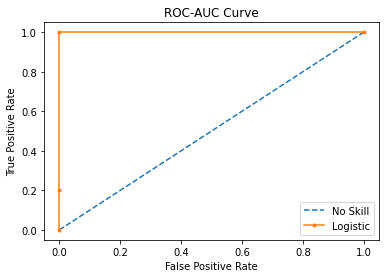

In [262]:
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
#model = LogisticRegression(solver='lbfgs')
#model.fit(trainX, trainy)
# predict probabilities
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# Title of plot
plt.title("ROC-AUC Curve")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Evaluating Model: Is it reliable?

In [280]:
## Evaluating Model 
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


# evaluate a model with a given number of repeats
def evaluate_model(df_final, output, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, df_final, output, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


repeats = range(1,15)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(df_final, output, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(mean(scores))


>1 mean=0.9979 se=0.002
>2 mean=0.9979 se=0.001
>3 mean=0.9981 se=0.001
>4 mean=0.9977 se=0.001
>5 mean=0.9977 se=0.001
>6 mean=0.9979 se=0.001
>7 mean=0.9980 se=0.001
>8 mean=0.9981 se=0.001
>9 mean=0.9983 se=0.000
>10 mean=0.9982 se=0.000
>11 mean=0.9982 se=0.000
>12 mean=0.9980 se=0.000
>13 mean=0.9979 se=0.000
>14 mean=0.9980 se=0.000


Observation: 
    
Fairly stable average accuracy score with low standard error of means.

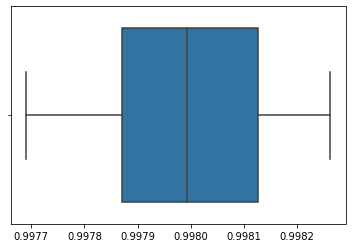

In [282]:
#Checking average performance for all models
sns.boxplot(results)

Observation: 

Based on K-Fold cross validation with 14 repeats with Logistic Regression as base model, on an average we can expect nearly 99% accuracy. 

### Summary:

We have data on performance of backetball teams. 

As the data was dominated by numerical, and we could observe some correlation among multiple features. This observation led us to use PCA to reduce dimensionality of data. 

We removed the high cardinality categorical features as the tend to result in overfitting if the data is not large enough

As the data seemed linearly separable from the scatterplot and the outcome is binary, we decided to proceed with Logistic regression. 

Once we got a good base model we checked the reliability using repetative k-fold cross valihdation.


### Conclusion: 

Our model can hep us predict if a team will be able to achieve top 8 spot in tournament or not with nearly 99% accuracy. 


### Application: 

Using this model, the team management can predict wheather a team will land in top 8 positions or not, with 99% accuracy. 

This might help in further improvements in team performance indicators like ADJOE,BARTHAG,EFG_O,2P_O,3P_O; and reduction in  ADJDE,EFG_D,TOR,2P_D,3P_D to improve the chances of winning more games and thus landing in top8 position in the tournament.


### Limitaion: 

With assitance of a domain expert better insights can be drawn from the data regarding team performance indicators and their effect on reaching good spot in tournament.
